# TF-IDF

Term Frequency - Inverse Document Frequency (TF-IDF) is a widely used statistical method in natural language processing and information retrieval. It measures how important a term is within a document relative to a collection of documents (i.e., relative to a corpus). Words within a text document are transformed into importance numbers by a text vectorization process. There are many different text vectorization scoring schemes, with TF-IDF being one of the most common.

**Term Frequency:** TF of a term or word is the number of times the term appears in a document compared to the total number of words in the document.

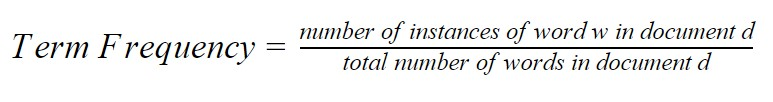

**Inverse Document Frequency:** IDF of a term reflects the proportion of documents in the corpus that contain the term. Words unique to a small percentage of documents (e.g., technical jargon terms) receive higher importance values than words common across all documents (e.g., a, the, and).

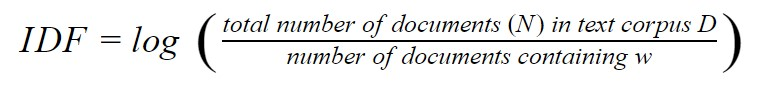

The TF-IDF of a term is calculated by multiplying TF and IDF scores.

**TF-IDF = TF * IDF**

Importance of a term is high when it occurs a lot in a given document and rarely in others. In short, commonality within a document measured by TF is balanced by rarity between documents measured by IDF. The resulting TF-IDF score reflects the importance of a term for a document in the corpus.

TF-IDF is useful in many natural language processing applications. For example, Search Engines use TF-IDF to rank the relevance of a document for a query. TF-IDF is also employed in text classification, text summarization, and topic modeling.

**TF-IDF Algorithm Implementation**

In [1]:
import pandas as pd
import numpy as np

In [2]:
corpus = ['Natural language processing is fun and interesting',
          'Natural language processing is fun',
          'Hindi language is interesting' ]

In [3]:
#creating a word set for the corpus
words_set = set()

for doc in  corpus:
    words = doc.split(' ')
    words_set = words_set.union(set(words))
    
print('Number of words in the corpus:',len(words_set))
print('The words in the corpus: \n', words_set)

Number of words in the corpus: 8
The words in the corpus: 
 {'fun', 'is', 'Natural', 'and', 'interesting', 'Hindi', 'language', 'processing'}


Computing Term Frequency

In [4]:
#creating a dataframe by the number of documents in the corpus and the word set, and use that information to compute the term frequency (TF)
n_docs = len(corpus)         #·Number of documents in the corpus
n_words_set = len(words_set) #·Number of unique words in the 

df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=words_set)

# Compute Term Frequency (TF)
for i in range(n_docs):
    words = corpus[i].split(' ') # Words in the document
    for w in words:
        df_tf[w][i] = df_tf[w][i] + (1 / len(words))
        
df_tf

,fun,is,Natural,and,interesting,Hindi,language,processing
0,0.142857,0.142857,0.142857,0.142857,0.142857,0.00,0.142857,0.142857
1,0.200000,0.200000,0.200000,0.000000,0.000000,0.00,0.200000,0.200000
2,0.000000,0.250000,0.000000,0.000000,0.250000,0.25,0.250000,0.000000


Computing Inverse Document Frequency

In [5]:
print("IDF of: ")

idf = {}

for w in words_set:
    k = 0    # number of documents in the corpus that contain this word
    
    for i in range(n_docs):
        if w in corpus[i].split():
            k += 1
            
    idf[w] =  np.log10(n_docs / k)
    
    print(f'{w:>15}: {idf[w]:>10}' )

IDF of: 
            fun: 0.17609125905568124
             is:        0.0
        Natural: 0.17609125905568124
            and: 0.47712125471966244
    interesting: 0.17609125905568124
          Hindi: 0.47712125471966244
       language:        0.0
     processing: 0.17609125905568124


**Note the IDF value of the word "is"**

Computing TF-IDF

In [6]:
df_tf_idf = df_tf.copy()

for w in words_set:
    for i in range(n_docs):
        df_tf_idf[w][i] = df_tf[w][i] * idf[w]
        
df_tf_idf

,fun,is,Natural,and,interesting,Hindi,language,processing
0,0.025156,0.0,0.025156,0.06816,0.025156,0.00000,0.0,0.025156
1,0.035218,0.0,0.035218,0.00000,0.000000,0.00000,0.0,0.035218
2,0.000000,0.0,0.000000,0.00000,0.044023,0.11928,0.0,0.000000


# TF-IDF using sklearn library

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(corpus)

In [9]:
tf_idf_array = tf_idf_vector.toarray()

print(tf_idf_array)

[[0.49929819 0.37972915 0.         0.37972915 0.29489356 0.29489356
  0.37972915 0.37972915]
 [0.         0.48759135 0.         0.         0.37865818 0.37865818
  0.48759135 0.48759135]
 [0.         0.         0.66283998 0.50410689 0.39148397 0.39148397
  0.         0.        ]]


In [11]:
words_set = tr_idf_model.get_feature_names_out()

print(words_set)

['and' 'fun' 'hindi' 'interesting' 'is' 'language' 'natural' 'processing']


In [12]:
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)

df_tf_idf

,and,fun,hindi,interesting,is,language,natural,processing
0,0.499298,0.379729,0.00000,0.379729,0.294894,0.294894,0.379729,0.379729
1,0.000000,0.487591,0.00000,0.000000,0.378658,0.378658,0.487591,0.487591
2,0.000000,0.000000,0.66284,0.504107,0.391484,0.391484,0.000000,0.000000


To learn more about how sklearn calculates TF-IDF term weighting visit:

https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting